# 0. Biased Random Sampling

Given an array `q` such that `sum(q) = 1` and `0 <= q[i] <= 1`, generate a random variable $x$ such that $\mathcal{P}\{x=i\}=q[i]$ -- `x` takes values in `range(len(q))` and `x = i` with probability `q[i]`.

Write a barebones plain Python version first and then optimize it (easier with numpy).

In [ ]:
from random import uniform
import numpy as np

def sample(q):
    a = 0.0
    U = uniform(0,1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]

def sample_np(q):
    C = np.cumsum(q)
    return C.searchsorted(np.random.uniform(0,1)) #for k draws, add ,size=k to np.random.uniform

# 1. :suspicious:

You're applying for a data scientist post in Mr. Grump's presidential campaign group. To impress him, you have come up with an idea to deny visas for Puerto Ricans.

|1999|2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|
-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
People who died by falling out of their bed Deaths (US) (CDC)|400|450|516|551|594|503|621|626|690|737|780|718
Lawyers in Puerto Rico|9,892|10,195|11,071|10,947|11,209|11,191|11,805|11,767|12,142|12,454|13,071|13,282

_(real data from US CDC and Lawyers ABA)_. 

Find trends in this data and present it. (Mr. Grump is a visual man and his aide is a numbers guy)

**Hint: ** find the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient): $\rho_{X,Y} = \dfrac{\mathrm{cov}(X,Y)}{\sigma_X\sigma_Y}$ where $\mathrm{cov}$ is the covariance and $\sigma_X$ is the standard deviation of $X$.

**Hint 2: **  If the fact that 400 people died from falling out of their beds in 1999 and those numbers just kept increasing with the number Puerto Rican lawyers isn't making you the least bit curious, move on to the next question.

In [28]:
year = range(1999,2011)
bed = [400,450,516,551,594,503,621,626,690,737,780,718] #"400|450|516|551|594|503|621|626|690|737|780|718".split("|")
law = [9892,10195,11071,10947,11209,11191,11805,11767,12142,12454,13071,13282]

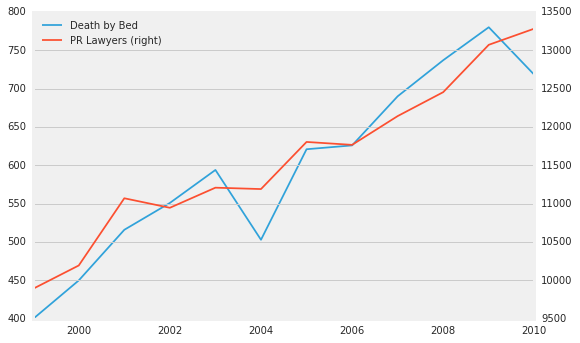

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

plt.style.use('seaborn-notebook')

ds1 = pd.Series(bed, index=year)
ds2 = pd.Series(law, index=year)

ds1.plot(label="Death by Bed", legend=True)
ds2.plot(secondary_y=True, label="PR Lawyers", legend=True)

In [27]:
import numpy as np
corrcoeff = np.corrcoef(bed,law)[0][1]
print "Percentage Correlation: " + str(corrcoeff**2 * 100)

Percentage Correlation: 91.6014789531


# 2. TEDx

1. Read the json file into pandas.
2. Display the top 10 languages and plot them.
3. Plot view counts by langugae.

(adapted from Berkeley's Open Data showcase)

In [2]:
import pandas as pd
import json

tedx_list = []
with open("tedx.json", "r") as tedx_json_file:
    for line in tedx_json_file:
        tedx_list.append(json.loads(line))
    tedx_df = pd.DataFrame(tedx_list)
    
tedx_df.set_index('id', inplace=True, drop=True)

tedx_df.columns

Index([u'category', u'commentCount', u'country', u'duration', u'event',
       u'favoriteCount', u'lang', u'likeCount', u'rating', u'ratingCount',
       u'tags', u'thumbnail', u'title', u'topic', u'uploaded', u'viewCount'],
      dtype='object')

In [50]:
tedx_df['lang'].value_counts()[:10] #top 10 languages

English       17479
Spanish        1388
Portuguese     1002
Korean          654
French          559
Arabic          471
Russian         397
Japanese        289
Italian         253
Polish          158
Name: lang, dtype: int64

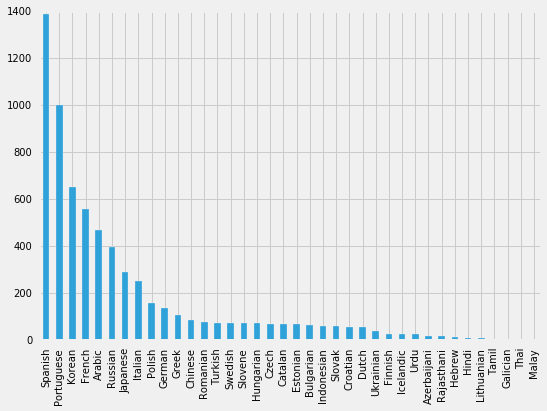

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')

tedx_df[tedx_df.lang != 'English']['lang'].value_counts().plot(kind="bar")

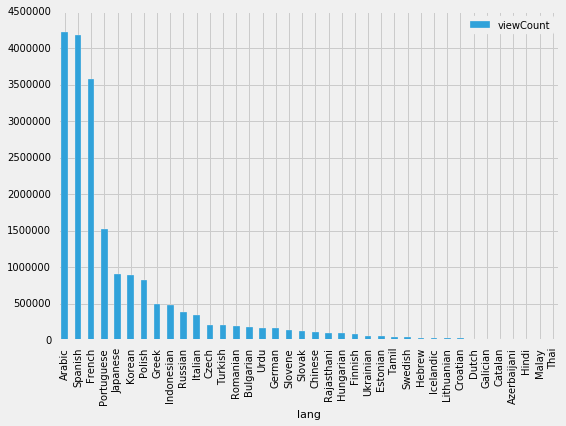

In [68]:
tedx_df['viewCount'] = tedx_df['viewCount'].fillna(0)
tmp = tedx_df[tedx_df.lang!='English'].copy()
tmp[tmp.viewCount!='-'][['viewCount', 'lang']]\
.groupby('lang').sum().sort_values('viewCount', ascending=False).plot(kind='bar')

# 3. Death by Movie

1. Parse `filmdeathcounts.csv`. Print the first few entries.
2. For each film, compute the body count/minute.
3. For each year, find the mean, median and total
    1. `body count`
    2. `minutes`
    3. `body count/min`
4. Visualize the following trends:
    1. Number of films over the years in this dataset.
    2. Total body count.
    3. Mean, median (side by side) body counts
    4. Mean, median (side by side) body counts/minute
5. Find the most violent films -- visualize their ranks by plotting the total body count and body count per minute in descending order.
6. Plot genre (x axis) by body count per minute (y axis) as a bar chart.

(stolen from Ramiro Gomez)

In [97]:
import pandas as pd
import numpy as np

df = pd.read_csv('filmdeathcounts.csv')
df.head() #1. first few entries

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


In [98]:
#compute body count/min
df['Body count/min'] = df['Body count'] / df['Minutes'].astype(float)
df.head()

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB,Body count/min
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,0.059829
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,0.469027
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,2.120000
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,0.592920
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,5.128205


In [106]:
#yearwise stats
df_year = df.groupby('Year').agg([np.mean, np.median, sum])
df_year.tail() #recent years

Body count                  Minutes                   IMDB         \
            mean median   sum        mean median   sum      mean median   
Year                                                                      
2007   85.312500   45.5  4095  114.062500  111.0  5475  6.829167   7.00   
2008   68.653846   37.0  1785  109.615385  108.5  2850  6.573077   6.65   
2009   55.000000   59.0   605  112.272727  110.0  1235  6.845455   6.60   
2010  129.750000  126.0   519  115.750000  111.0   463  7.250000   7.25   
2013  156.000000  156.0   156  119.000000  119.0   119  6.500000   6.50   

            Body count/min                       
        sum           mean    median        sum  
Year                                             
2007  327.8       0.749838  0.366966  35.992220  
2008  170.9       0.635468  0.371208  16.522174  
2009   75.3       0.518937  0.385621   5.708305  
2010   29.0       1.132110  1.005280   4.528441  
2013    6.5       1.310924  1.310924   1.310924

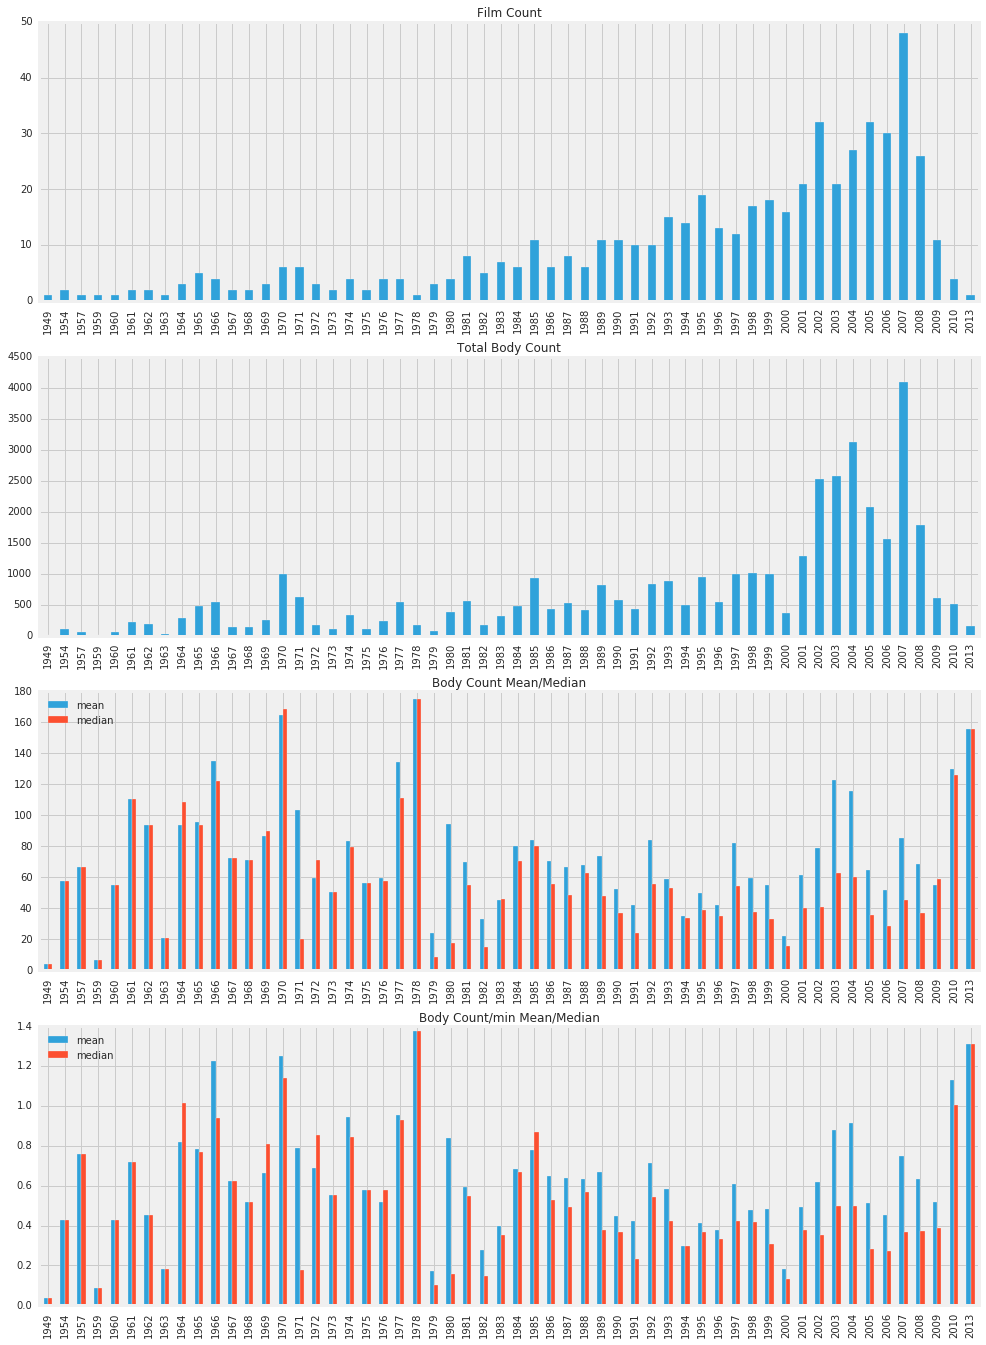

In [115]:
#extract only body count mean, median
df_bodycount = pd.DataFrame({'mean': df_year['Body count']['mean'],
                             'median': df_year['Body count']['median']})

df_bodycount_min = pd.DataFrame({'mean': df_year['Body count/min']['mean'],
                             'median': df_year['Body count/min']['median']})


#divide (15,23) into 4 rows of plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,23))

df.groupby('Year').agg(len)['Film'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Film Count')

df_year['Body count']['sum'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Body Count')

df_bodycount.plot(kind='bar', ax=axes[2])
axes[2].set_title('Body Count Mean/Median')

df_bodycount_min.plot(kind='bar', ax=axes[3])
axes[3].set_title('Body Count/min Mean/Median')

for _ in range(4):
    axes[_].set_xlabel('', visible=False)
    

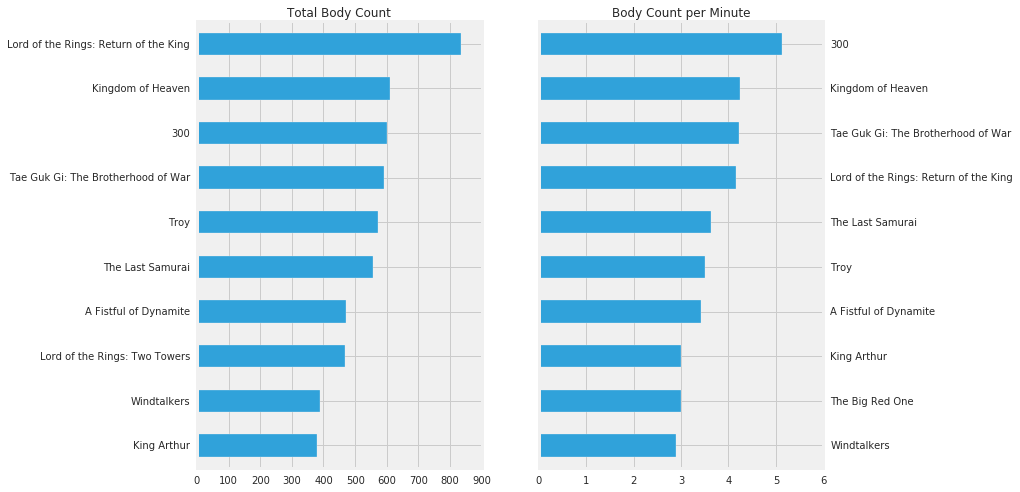

In [117]:
df_film = df.set_index('Film')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

bodycount = df_film.sort_values('Body count')['Body count'].tail(10)
bodycount.plot(kind='barh', ax=axes[0])
axes[0].set_title('Total Body Count')

bodycount_min = df_film.sort_values('Body count/min')['Body count/min'].tail(10)
bodycount_min.plot(kind='barh', ax=axes[1])
axes[1].set_title('Body Count per Minute')
axes[1].yaxis.set_ticks_position('right')

for _ in range(2):
    axes[_].set_ylabel('',visible=False)

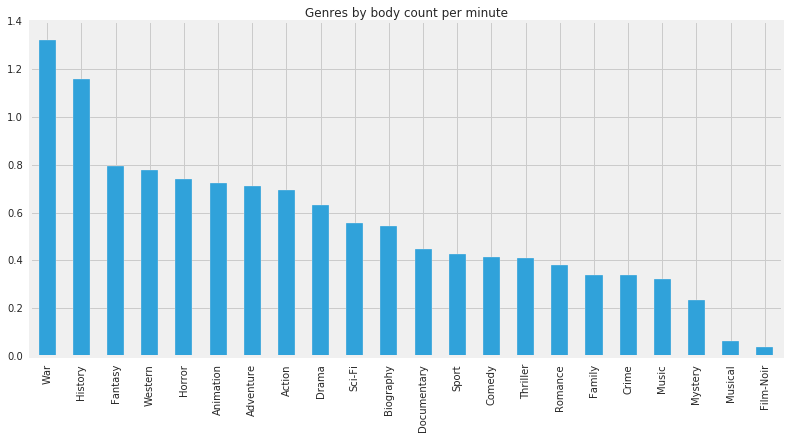

In [121]:
#if there are multiple genres, split them into duplicate entries
new_dict = {}
idx = 0
for row in df.iterrows():
    d = row[1]
    genres = d['Genre'].split('|')
    for genre in genres:
        c = d.copy()
        c['Genre'] = genre
        new_dict[idx] = c
        idx += 1
df_genre = pd.DataFrame(new_dict).transpose()

df_genre['Body count'] = df_genre['Body count'].astype(float)
df_genre['Body count/min'] = df_genre['Body count/min'].astype(float)

df_genre.groupby('Genre').agg(np.mean).sort_values('Body count/min', ascending=False)['Body count/min'].plot(kind='bar', figsize=(12,6), title='Genres by body count per minute').set_xlabel('', visible=False)

In [123]:
df_genre[(df_genre['Genre'] == 'War') | (df_genre['Genre'] == 'History')].sort_values('Body count/min', ascending=False).head(20)

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB,Body count/min
14,300,2007,600.0,R,History,Zack Snyder,117,7.7,5.128205
15,300,2007,600.0,R,War,Zack Snyder,117,7.7,5.128205
668,Kingdom of Heaven,2005,610.0,R,History,Ridley Scott,144,7.1,4.236111
669,Kingdom of Heaven,2005,610.0,R,War,Ridley Scott,144,7.1,4.236111
1204,Tae Guk Gi: The Brotherhood of War,2004,590.0,R,War,Je-kyu Kang,140,8.1,4.214286
1388,The Last Samurai,2003,558.0,R,History,Edward Zwick,154,7.7,3.623377
1389,The Last Samurai,2003,558.0,R,War,Edward Zwick,154,7.7,3.623377
1254,The Big Red One,1980,338.0,R,War,Samuel Fuller,113,7.3,2.991150
1658,Windtalkers,2002,389.0,R,War,John Woo,134,5.9,2.902985
956,Rambo,2008,247.0,R,War,Sylvester Stallone,92,7.1,2.684783


# Enabling IPython Widgets

Run `jupyter nbextension enable --py --sys-prefix widgetsnbextension` in the terminal. Do a `pip install --upgrade ipywidgets` if there are more errors.

# (Optional) Mathematically Modeling Hipsters

_(explore at your own pace)_, credits: jakevdp

[This paper](http://arxiv.org/abs/1410.8001): *The Hipster Effect: When Anticonformists All Look The Same* essentially describes a simple mathematical model which models conformity and non-conformity among a mutually interacting population, and finds some interesting results: namely, **conformity among a population of self-conscious non-conformists is similar to a phase transition in a time-delayed thermodynamic system**. In other words, with enough hipsters around responding to delayed fashion trends, a plethora of facial hair and fixed gear bikes is a natural result.


We'll start by defining the problem, and going through the notation suggested in the paper. We'll consider a group of $N$ people, and define the following quantities:

- $\epsilon_i$ : this value is either $+1$ or $-1$. $+1$ means person $i$ is a hipster, while $-1$ means they're a conformist.
- $s_i(t)$ : this is also either $+1$ or $-1$. This indicates person $i$'s choice of style at time $t$. For example, $+1$ might indicated a bushy beard, while $-1$ indicates clean-shaven.
- $J_{ij}$ : The influence matrix. This is a value greater than zero which indicates how much person $j$ influences person $i$.
- $\tau_{ij}$ : The delay matrix. This is an integer telling us the length of delay for the style of person $j$ to affect the style of person $i$.

The idea of the model is this: on any given day, person $i$ looks at the world around him or her, and sees some previous day's version of everyone else. This information is $s_j(t - \tau_{ij})$.

The amount that person $j$ influences person $i$ is given by the influence matrix, $J_{ij}$, and after putting all the information together, we see that person $i$'s mean impression of the world's style is

$$
m_i(t) = \frac{1}{N} \sum_j J_{ij} \cdot s_j(t - \tau_{ij})
$$

Given the problem setup, we can quickly check whether this impression matches their own current style:

- if $m_i(t) \cdot s_i(t) > 0$, then person $i$ matches those around them
- if $m_i(t) \cdot s_i(t) < 0$, then person $i$ looks different than those around them

A hipster who notices that their style matches that of the world around them will risk giving up all their hipster cred if they don't change quickly; a conformist will have the opposite reaction. Because $\epsilon_i$ = $+1$ for a hipster and $-1$ for a conformist, we can encode this observation in a single value which tells us what which way the person will lean that day:

$$
x_i(t) = -\epsilon_i m_i(t) s_i(t)
$$

Simple! If $x_i(t) > 0$, then person $i$ will more likely switch their style that day, and if $x_i(t) < 0$, person $i$ will more likely maintain the same style as the previous day. So we have a formula for how to update each person's style based on their preferences, their influences, and the world around them.

But the world is a noisy place. Each person might have other things going on that day, so instead of using this value directly, we can turn it in to a probabilistic statement.  Consider the function

$$
\phi(x;\beta) = \frac{1 + \tanh(\beta \cdot x)}{2}
$$

We can plot this function quickly:

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn styles for nice-looking plots
import seaborn; seaborn.set() #comment this out if you don't have seaborn -- recommended for viz.

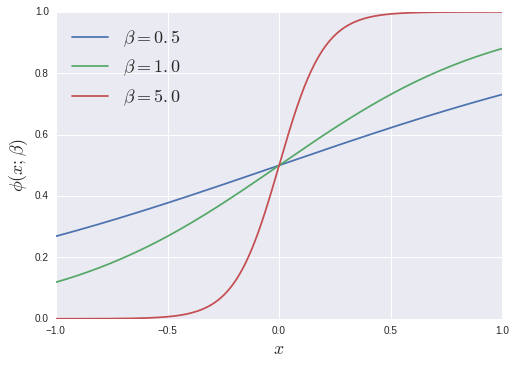

In [2]:
x = np.linspace(-1, 1, 1000)
for beta in [0.5, 1, 5]:
    plt.plot(x, 0.5 * (1 + np.tanh(beta * x)),
             label=r'$\beta = {0:.1f}$'.format(beta))
plt.legend(loc='upper left', fontsize=18)
plt.xlabel('$x$', size=18); plt.ylabel(r'$\phi(x;\beta)$', size=18);

This gives us a nice way to move from our preference $x_i$ to a probability of switching styles. Here $\beta$ is inversely related to noise. For large $\beta$, the noise is small and we basically map $x > 0$ to a 100% probability of switching, and $x<0$ to a 0% probability of switching. As $\beta$ gets smaller, the probabilities get less and less distinct.

Let's see this model in action. We'll start by defining a class which implements everything we've gone through above:

In [3]:
class HipsterStep(object):
    """Class to implement hipster evolution
    
    Parameters
    ----------
    initial_style : length-N array
        values > 0 indicate one style, while values <= 0 indicate the other.
    is_hipster : length-N array
        True or False, indicating whether each person is a hipster
    influence_matrix : N x N array
        Array of non-negative values. influence_matrix[i, j] indicates
        how much influence person j has on person i
    delay_matrix : N x N array
        Array of positive integers. delay_matrix[i, j] indicates the
        number of days delay between person j's influence on person i.
    """
    def __init__(self, initial_style, is_hipster,
                 influence_matrix, delay_matrix,
                 beta=1, rseed=None):
        self.initial_style = initial_style
        self.is_hipster = is_hipster
        self.influence_matrix = influence_matrix
        self.delay_matrix = delay_matrix
        
        self.rng = np.random.RandomState(rseed)
        self.beta = beta
        
        # make s array consisting of -1 and 1
        self.s = -1 + 2 * (np.atleast_2d(initial_style) > 0)
        N = self.s.shape[1]
        
        # make eps array consisting of -1 and 1
        self.eps = -1 + 2 * (np.asarray(is_hipster) > 0)
        
        # create influence_matrix and delay_matrix
        self.J = np.asarray(influence_matrix, dtype=float)
        self.tau = np.asarray(delay_matrix, dtype=int)
        
        # validate all the inputs
        assert self.s.ndim == 2
        assert self.s.shape[1] == N
        assert self.eps.shape == (N,)
        assert self.J.shape == (N, N)
        assert np.all(self.J >= 0)
        assert np.all(self.tau > 0)

    @staticmethod
    def phi(x, beta):
        return 0.5 * (1 + np.tanh(beta * x))
            
    def step_once(self):
        N = self.s.shape[1]
        
        # iref[i, j] gives the index for the j^th individual's
        # time-delayed influence on the i^th individual
        iref = np.maximum(0, self.s.shape[0] - self.tau)
        
        # sref[i, j] gives the previous state of the j^th individual
        # which affects the current state of the i^th individual
        sref = self.s[iref, np.arange(N)]

        # m[i] is the mean of weighted influences of other individuals
        m = (self.J * sref).sum(1) / self.J.sum(1)
        
        # From m, we use the sigmoid function to compute a transition probability
        transition_prob = self.phi(-self.eps * m * self.s[-1], beta=self.beta)
        
        # Now choose steps stochastically based on this probability
        new_s = np.where(transition_prob > self.rng.rand(N), -1, 1) * self.s[-1]
        
        # Add this to the results, and return
        self.s = np.vstack([self.s, new_s])
        return self.s
    
    def step(self, N):
        for i in range(N):
            self.step_once()
        return self.s
    
    def trend(self, hipster=True, return_std=True):
        if hipster:
            subgroup = self.s[:, self.eps > 0]
        else:
            subgroup = self.s[:, self.eps < 0]
            
        return subgroup.mean(1), subgroup.std(1)

Now we'll create a function which plots the trend for a certain number of time steps:

In [14]:
def plot_results(Npeople=500, Nsteps=200,
                 hipster_frac=0.8, initial_state_frac=0.5,
                 delay=20, log10_beta=0.5, rseed=42):
    rng = np.random.RandomState(rseed)
    
    initial_state = (rng.rand(1, Npeople) > initial_state_frac)
    is_hipster = (rng.rand(Npeople) > hipster_frac)

    influence_matrix = abs(rng.randn(Npeople, Npeople))
    influence_matrix.flat[::Npeople + 1] = 0
    
    delay_matrix = 1 + rng.poisson(delay, size=(Npeople, Npeople))

    h = HipsterStep(initial_state, is_hipster,
                    influence_matrix, delay_matrix=delay_matrix,
                    beta=10 ** log10_beta, rseed=rseed)
    h.step(Nsteps)
    
    def beard_formatter(y, loc):
        if y == 1:
            return 'bushy-\nbeard'
        elif y == -1:
            return 'clean-\nshaven'
        else:
            return ''
        
    t = np.arange(Nsteps + 1)

    fig, ax = plt.subplots(1, sharex=True, figsize=(8, 6))
    
    mu, std = h.trend(True)
    ax.plot(t, mu, c='red', label='hipster')
    ax.fill_between(t, mu - std, mu + std, color='red', alpha=0.2)
    
    mu, std = h.trend(False)
    ax.plot(t, mu, c='blue', label='conformist')
    ax.fill_between(t, mu - std, mu + std, color='blue', alpha=0.2)
    
    ax.set_xlabel('time')
    ax.set_ylabel('Trend')
    ax.legend(loc='best')
    ax.set_ylim(-1.1, 1.1);
    ax.set_xlim(0, Nsteps)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(beard_formatter))

## Exploring the Result

With this code in place, we can now explore the result. We'll start by seeing what happens when just 10% of the population is made up of non-conformist hipsters:

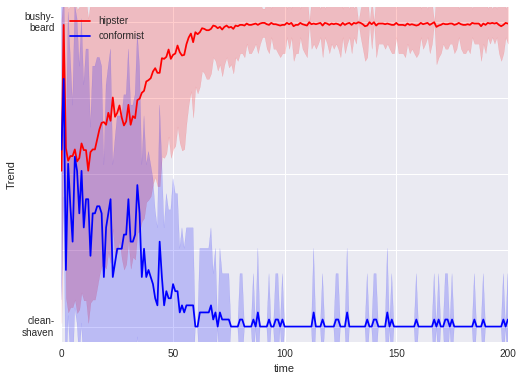

In [15]:
plot_results(hipster_frac=0.1)

We see the mean and standard deviation of the styles of all hipsters (red) and all conformists (blue).

This plot shows something relatively unsurprising: when there are only a few hipsters in the population, we quickly reach an equilibrium where hipsters all have one style (a bushy beard) while the norm-core conformists have the opposite (clean shaven faces).

Let's see what happens if there are more hipsters in the population:

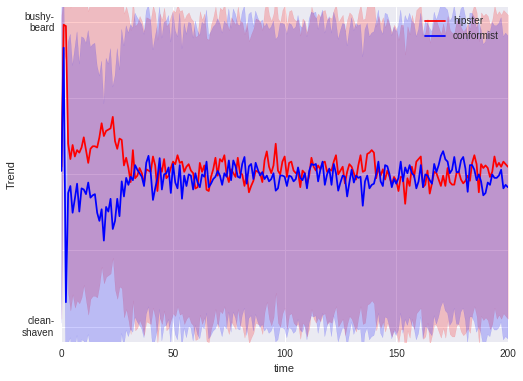

In [16]:
plot_results(hipster_frac=0.5)

With half the population made up of hipsters, the trend washes out. There is so much noise and confusion about styles, that both the hipsters and the conformists have a wide range of styles at any given time.

Now let's see what happens when we have even more hipsters:

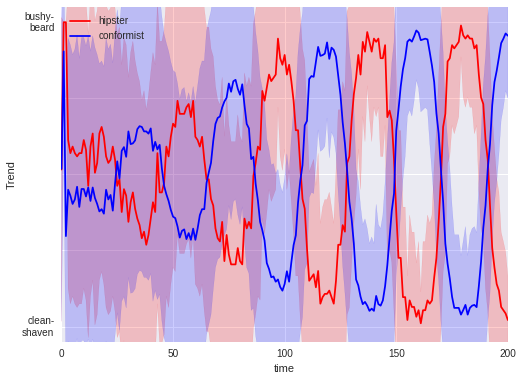

In [17]:
plot_results(hipster_frac=0.8)

Now this is getting interesting! With a population dominated by hipsters, we end up approaching steady cycles in trends. The hipsters start trying to distance themselves from the "normal" style, and then the normal style moves to catch up with them. The hipsters then swing the other way, and the process repeats. This is an example of the "phase transition" that the author of the original paper talked about in analogy to thermodynamic systems: above certain critical values of the model parameters, a qualitatively new type of behavior appears out of the noise. This oscillation can be thought of as a rough and simplistic mathematical model for recurrent cycles of cultural and fashion trends that anyone over a couple decades old has probably noticed over time.

But let's explore this even more.

What we'll do is to call IPython's interactive tools on our Python function, which will create javascript sliders allowing us to explore the parameter space of this hipster conformity model.

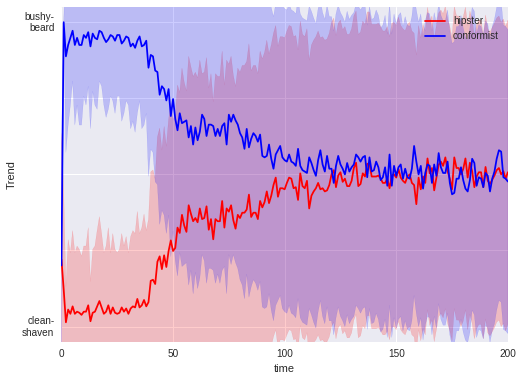

In [18]:
from IPython.html.widgets import interact, fixed

interact(plot_results, hipster_frac=(0.0, 1.0), delay=(1, 50),
         initial_state_frac=(0.0, 1.0), log10_beta=(-2.0, 2.0),
         Npeople=fixed(500), Nsteps=fixed(200), rseed=fixed(42));